## DATASET DE DIABETES


Librerias a usar:

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

Lectura del dataframe y manejo de datos sobresalientes:

In [145]:

DataFrame = pd.read_csv('diabetes.csv')

#transforma los datos faltantes en NaN
DataFrame[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = DataFrame[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)

DataFrame

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


Cantidad de datos faltantes por columna

In [146]:
DataFrame.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Como se puede observar, existen bastantes datos faltantes principalmente en la insulina y el grosor de la piel. Por lo que es necesario rellenar esos espacios vacios

In [147]:
#llena los espacios vacios con la media de la columna
DataFrame = DataFrame.where(pd.notna(DataFrame),DataFrame.mean(), axis = 1)

#Quita los outliers donde el zscore es mayor a 3
DataFrame = DataFrame[(np.abs(stats.zscore(DataFrame)) < 3).all(axis=1)]

DataFrame

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,29.15342,155.548223,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


Division de los datos en Training, Testing y validación

In [148]:
DataFrame= DataFrame.sample(frac=1)  #baraja el dataframe
ratio=0.70 # 80% del dataset


total_rows = DataFrame.shape[0]
train_size = int(total_rows * ratio)


DataFrameTraining = DataFrame[0:train_size]

#dataframe a testear

#Guarda el 30% restante
DataFrameExtra = DataFrame[train_size:] 


ratio = 0.50

total_rows = DataFrameExtra.shape[0]
testing_size = int(total_rows * ratio)

DataFrameTesting = DataFrameExtra[0:testing_size]
DataFrameValidation = DataFrameExtra[testing_size:]



Estadística General de los Datos a usar:


In [149]:
DataFrameTraining.describe().map(lambda x: f"{x:0.2f}").T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,719.00,3.84,3.28,0.00,1.00,3.00,6.00,13.00
Glucose,719.00,120.05,29.64,44.00,99.00,115.00,138.00,199.00
BloodPressure,719.00,72.29,11.33,38.00,64.00,72.00,80.00,108.00
SkinThickness,719.00,28.77,8.15,7.00,25.00,29.15,32.00,54.00
Insulin,719.00,146.02,56.97,15.00,120.00,155.55,155.55,402.00
BMI,719.00,32.14,6.48,18.20,27.40,32.10,36.10,52.90
DiabetesPedigreeFunction,719.00,0.45,0.28,0.08,0.24,0.36,0.60,1.46
Age,719.00,32.92,11.31,21.00,24.00,29.00,40.00,68.00
Outcome,719.00,0.34,0.47,0.00,0.00,0.00,1.00,1.00


Gráfico de las columnas:

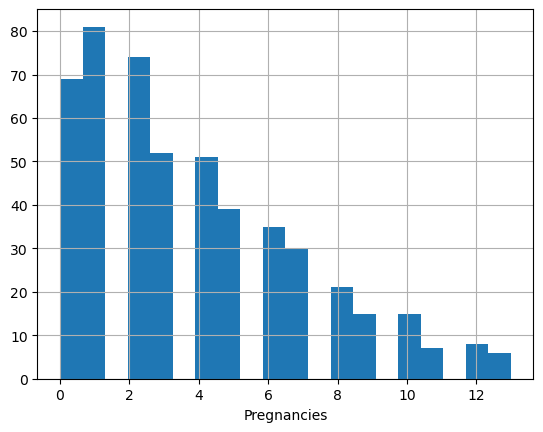

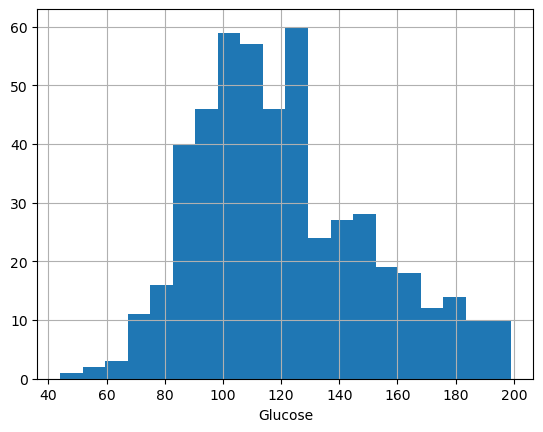

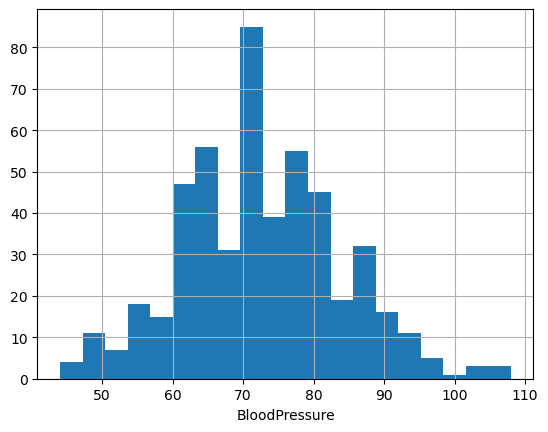

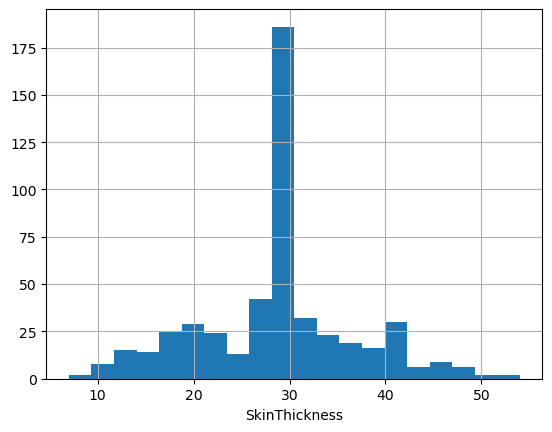

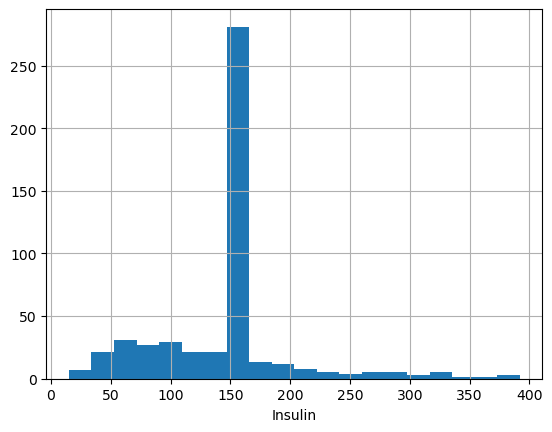

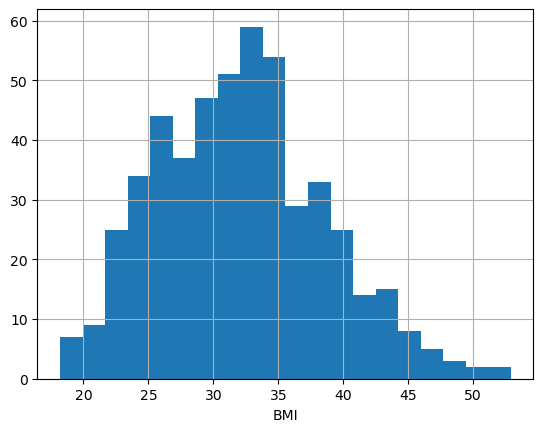

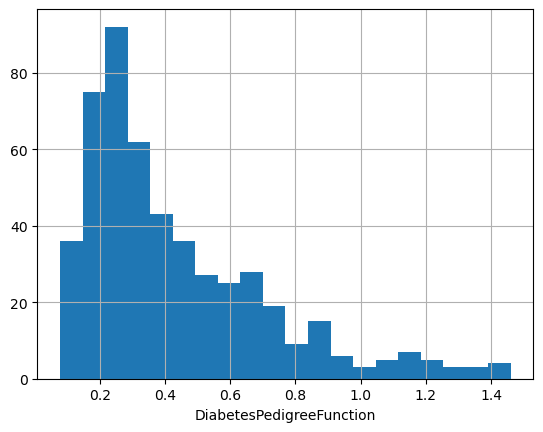

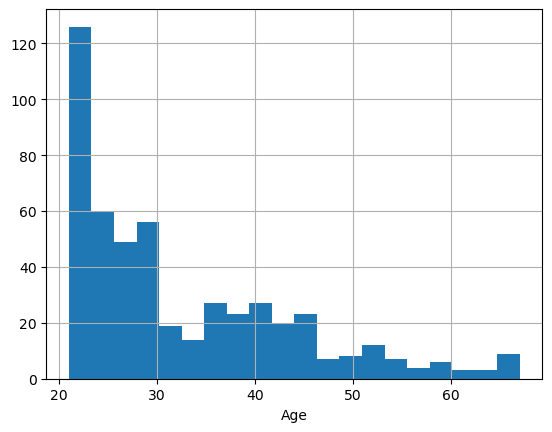

In [153]:
def plot_numerical_col(dataframe, numerical_col):
    dataframe[numerical_col].hist(bins=20)
    plt.xlabel(numerical_col)
    plt.show(block=True)

cols = [col for col in DataFrameTraining.columns if "Outcome" not in col]

for col in cols:
    plot_numerical_col(DataFrameTraining, col)

Cantidad de muestras con glucosa(1) y sin glucosa(0)

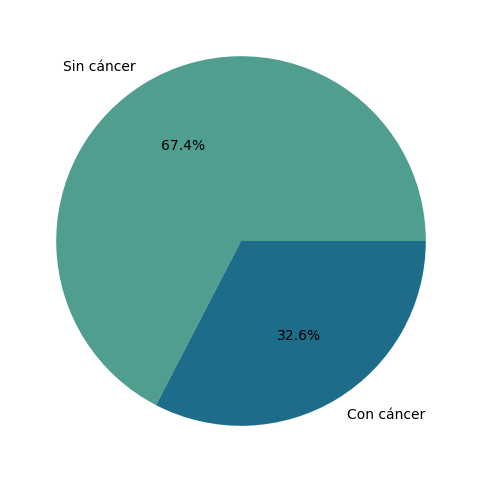

In [154]:
outcomes = DataFrameTraining['Outcome'].value_counts()

palette = sns.color_palette("crest", len(outcome_counts))

label = [ "Sin glucosa", "Con glucosa"]
plt.figure(figsize=(8,6))
plt.pie(outcomes, labels= label, colors=palette, autopct='%1.1f%%')
plt.show()

Gráficos de Dispersión

<Axes: xlabel='Glucose', ylabel='BloodPressure'>

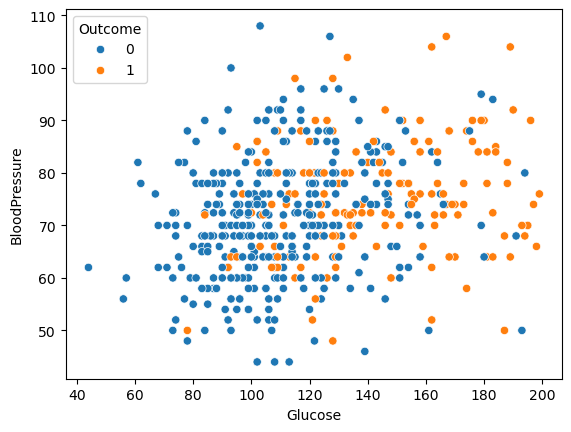

In [158]:
sns.scatterplot(data=DataFrameTraining, x="Glucose", y="BloodPressure", hue= 'Outcome')


<Axes: xlabel='Glucose', ylabel='Age'>

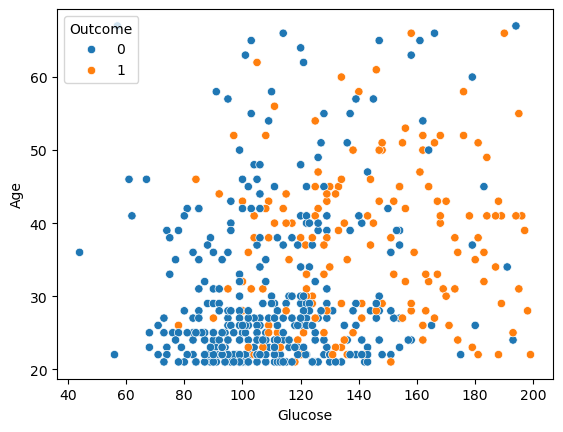

In [159]:
sns.scatterplot(data=DataFrameTraining, x="Glucose", y="Age", hue= 'Outcome')
